# **** Analysis

### Load and Read the files

In [23]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load 
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [24]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Summary DataFrame 

In [25]:
#  Total rides for each city type
total_rides_by_city = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_city

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [26]:
# Total drivers for each city type
total_drivers_by_city = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_city

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [27]:
#  Total amount of fares for each city type
total_fares_by_city = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_city

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [28]:
#  Average fare per ride for each city type. 
ave_fare_per_ride = total_fares_by_city / total_rides_by_city
ave_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [29]:
# Average fare per driver for each city type. 
ave_fare_per_driver = total_fares_by_city / total_drivers_by_city
ave_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [43]:
#  Summary DataFrame. 
pyber_summary_df = pd.DataFrame()
pyber_summary_df["Total Rides"] = total_rides_by_city
pyber_summary_df["Total Drivers"] = total_drivers_by_city
pyber_summary_df["Total Fares"] = total_fares_by_city
pyber_summary_df["Average Fare per Ride"] = ave_fare_per_ride
pyber_summary_df["Average Fare per Driver"] = ave_fare_per_driver
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [44]:
#  DataFrame Cleanup 
pyber_summary_df.index.name = None

In [45]:
#  Format columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map('{:,.0f}'.format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map('{:,.0f}'.format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map('${:,.2f}'.format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map('${:,.2f}'.format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map('${:,.2f}'.format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


Multiple line plot that shows the total weekly of the fares for each type of city.

In [53]:
# Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [62]:
# Create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
type_date_df = pyber_data_df.groupby(["type", "date"]).sum("fare")
type_date_df

fare        ride_id  driver_count
type  date                                                   
Rural 2019-01-01 09:45:36  43.69  2424875833354             1
      2019-01-02 11:18:32  52.12  3454018971635             1
      2019-01-03 19:51:01  19.90  5559509612597             8
      2019-01-04 03:31:26  24.88  4195619112933             8
      2019-01-06 07:38:40  47.33  3849747342021             4
...                          ...            ...           ...
Urban 2019-05-08 04:20:00  21.99   117997692054            52
      2019-05-08 04:39:49  18.45  1811574736337            11
      2019-05-08 07:29:01  18.55  5682021476085            33
      2019-05-08 11:38:35  19.77  7837163332630             4
      2019-05-08 13:10:18  18.04  5616262558026            58

[2375 rows x 3 columns]

In [64]:
# Reset the index on the DataFrame 
reset_type_date_df = type_date_df.reset_index()
reset_type_date_df

,type,date,fare,ride_id,driver_count
0,Rural,2019-01-01 09:45:36,43.69,2424875833354,1
1,Rural,2019-01-02 11:18:32,52.12,3454018971635,1
2,Rural,2019-01-03 19:51:01,19.90,5559509612597,8
3,Rural,2019-01-04 03:31:26,24.88,4195619112933,8
4,Rural,2019-01-06 07:38:40,47.33,3849747342021,4
...,...,...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99,117997692054,52
2371,Urban,2019-05-08 04:39:49,18.45,1811574736337,11
2372,Urban,2019-05-08 07:29:01,18.55,5682021476085,33
2373,Urban,2019-05-08 11:38:35,19.77,7837163332630,4


In [66]:
# Pivot table with the 'date' as the index 
# to get the total fares for each type of city by the date. 
pivot_type_date_df = reset_type_date_df.pivot(index= "date", columns = "type", values = "fare")
pivot_type_date_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [70]:
DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
jan_apr_df = pivot_type_date_df.loc["2019-01-01":"2019-04-29",:]
jan_apr_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [76]:
# Set "date" index to datetime datatype. 
jan_apr_df.index = pd.to_datetime(jan_apr_df.index)

In [77]:
# Check datatype for the index 
jan_apr_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [238]:
# DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares = jan_apr_df.resample("W").sum()
weekly_fares.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


<bound method _AxesBase.set_xbound of <AxesSubplot:title={'center':'Total Fare by City Type'}, ylabel='Fare ($USD)'>>

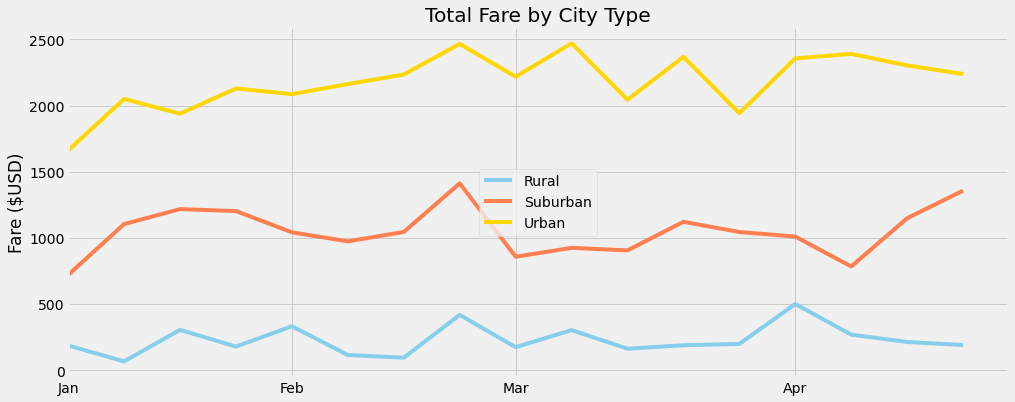

In [243]:
# Plot the resample DataFrame 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# weekly_fares.plot()

fig, ax = plt.subplots(figsize=(15, 6))
# ax.plot(weekly_fares)

ax.plot(weekly_fares.Rural, color='skyblue', label='Rural')
ax.plot(weekly_fares.Suburban, color='coral', label='Suburban')
ax.plot(weekly_fares.Urban, color='gold', label='Urban')
ax.legend()
ax.set_xlim(17902.0,)
ax.set_title('Total Fare by City Type')
ax.set_ylabel("Fare ($USD)")
ax.set_xticks(["2019-01-06", "2019-02-03", "2019-03-03", "2019-04-07"])
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr"])
ax.set_xbound

plt.savefig("analysis/PyBer_fare_summary.png")

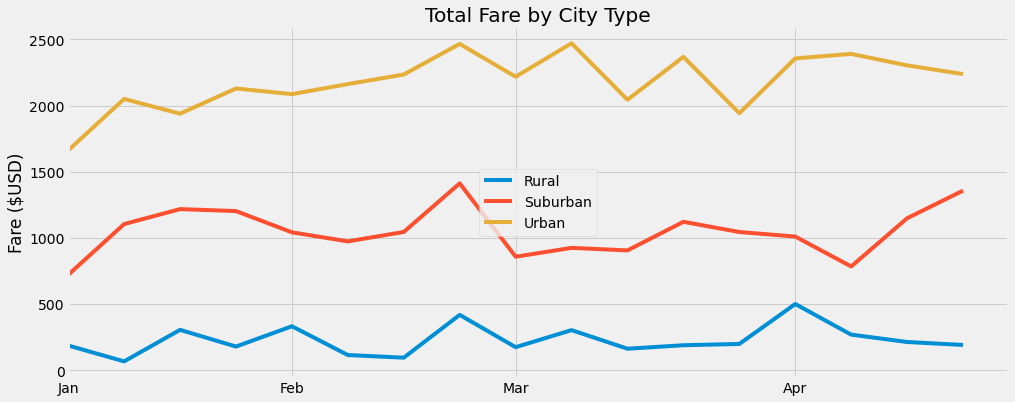

In [244]:
# Plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(weekly_fares.Rural, label='Rural')
ax.plot(weekly_fares.Suburban, label='Suburban')
ax.plot(weekly_fares.Urban, label='Urban')
ax.legend()
ax.set_xlim(17902.0,)
ax.set_title('Total Fare by City Type')
ax.set_ylabel("Fare ($USD)")
ax.set_xticks(["2019-01-06", "2019-02-03", "2019-03-03", "2019-04-07"])
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr"])
ax.set_xbound

plt.savefig("analysis/PyBer_fare_summary.png")